# Astrostatistics & Data Mining-HW5
## Ruan Hsuan Wei 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import emcee
%matplotlib inline

## Problem 1

In [2]:
data = np.genfromtxt('ps5_problem1.dat',dtype=None,skip_header=1)
x=data[:,0]
y=data[:,1]

### a)

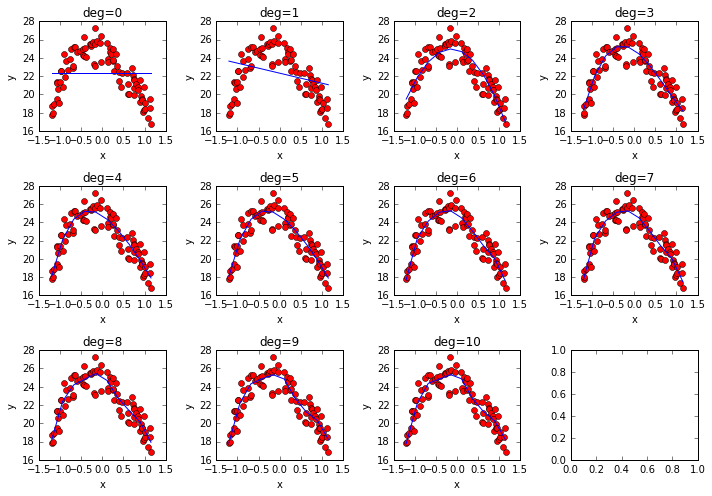

In [3]:
f, axarr = plt.subplots(3, 4,figsize=(10,7))
x_fit=np.linspace(np.min(x),np.max(x),10)
deg=0
for i in range(3):
    for j in range(4):
        if deg==11:
            break;
        p = np.polyfit(x, y, deg)
        y_fit = np.polyval(p, x_fit)
        axarr[i,j].plot(x,y,'ro')
        axarr[i,j].plot(x_fit,y_fit)
        axarr[i,j].set_title('deg=%d'%deg)
        axarr[i,j].set_xlabel('x')
        axarr[i,j].set_ylabel('y')
        deg=deg+1
plt.tight_layout()
plt.show()

### b)

In [4]:
#reduced chi-square
deg=[0,1, 2,3,4,5,6,7,8,9,10]
chi=[]
for degree in deg:
    p = np.polyfit(x, y, degree)
    y_fit = np.polyval(p, x)
    chi.append(np.sum(stats.chisquare(data.T,[x,y_fit],ddof=degree+1)[0])/(len(x)-degree-1))

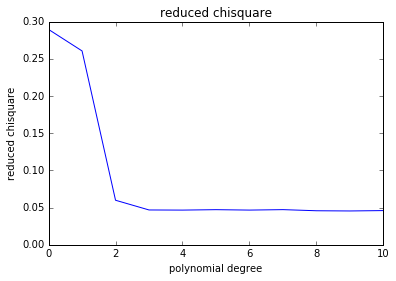

In [5]:
plt.plot(deg,chi)
plt.title("reduced chisquare")
plt.xlabel("polynomial degree")
plt.ylabel("reduced chisquare")

In [6]:
#cross validation
num=[i for i in range(len(x))]
order=np.random.choice(num,len(x),replace=False)
train_size=int(len(x)*0.6)
if (len(x)-train_size)%2==1:
    train_size=train_size+1
cross_size=(len(x)-train_size)/2
test_size=cross_size
training=[ x[order[i]] for i in range(train_size)]
training_y=[y[order[i]] for i in range(train_size)]
cross_val=[x[order[i]] for i in range(train_size,train_size+cross_size)]
cross_val_y=[y[order[i]] for i in range(train_size,train_size+cross_size)]
test=[x[order[i]] for i in range(train_size+cross_size,train_size+cross_size+test_size)]
training=np.array(training)
training_y=np.array(training_y)
cross_val=np.array(cross_val)
cross_val_y=np.array(cross_val_y)


deg=0,AIC=528.225935
deg=1,AIC=497.781121
deg=2,AIC=272.032735
deg=3,AIC=259.686223
deg=4,AIC=261.070113
deg=5,AIC=263.069573
deg=6,AIC=263.761828
deg=7,AIC=265.755470
deg=8,AIC=265.758559
deg=9,AIC=266.727734
deg=10,AIC=268.679528


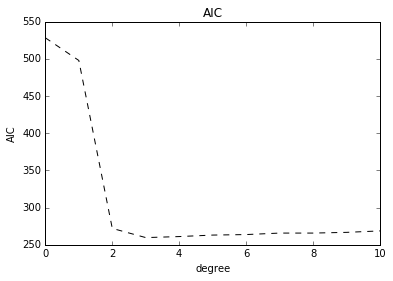

In [7]:
#AIC
def log_like(deg,x,y):
    p = np.polyfit(x, y, deg)
    y_fit = np.polyval(p, x)
    sigma_y=1.3
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2) + (y - y_fit) ** 2 / sigma_y ** 2)

plot_aic=[]
for k in deg: 
    aic=2*k - 2*(log_like(k,x,y))
    print "deg=%d,AIC=%f"%(k,aic)
    plot_aic.append(aic)
    
plt.plot(deg,plot_aic,'--k')
plt.title("AIC")
plt.xlabel("degree")
plt.ylabel("AIC")
plt.show()

deg=0,BIC=528.225935
deg=1,BIC=500.235469
deg=2,BIC=276.941430
deg=3,BIC=267.049265
deg=4,BIC=270.887502
deg=5,BIC=275.341310
deg=6,BIC=278.487912
deg=7,BIC=282.935901
deg=8,BIC=285.393338
deg=9,BIC=288.816860
deg=10,BIC=293.223001


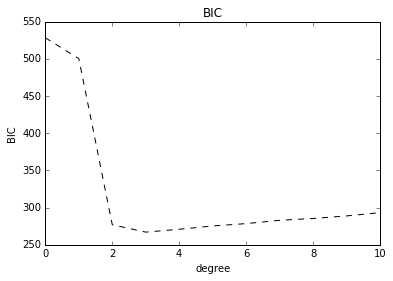

In [8]:
#BIC
def log_like(deg,x,y):
    p = np.polyfit(x, y, deg)
    y_fit = np.polyval(p, x)
    sigma_y=1.3
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2) + (y - y_fit) ** 2 / sigma_y ** 2)

plot_bic=[]
for k in deg: 
    bic=np.log(len(x))*k - 2*(log_like(k,x,y))
    print "deg=%d,BIC=%f"%(k,bic)
    plot_bic.append(bic)
    
plt.plot(deg,plot_bic,'--k')
plt.title("BIC")
plt.xlabel("degree")
plt.ylabel("BIC")
plt.show()

### c)

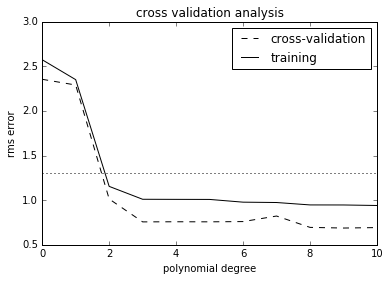

In [9]:
d = np.arange(0, 11)
dy=1.3
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)
for i in range(len(d)):
    p = np.polyfit(training, training_y, i)
    training_err[i] = np.sqrt(np.sum((np.polyval(p, training) - training_y) ** 2)/len(training_y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, cross_val) - cross_val_y) ** 2)/len(cross_val_y))

# BIC_train = np.sqrt(len(training_y)) * training_err / dy + d * np.log(len(training_y))
# BIC_crossval = np.sqrt(len(training_y)) * crossval_err / dy + d * np.log(len(training_y))

# plt.plot(d, BIC_crossval, '--k', label='cross-validation')
# plt.plot(d, BIC_train, '-k', label='training')
# plt.title("BIC")
# plt.xlabel("degree")
# plt.ylabel("BIC")
# plt.legend()
# plt.show()





plt.plot(d, crossval_err, '--k', label='cross-validation')
plt.plot(d, training_err, '-k', label='training')
plt.plot(d, 1.3 * np.ones(d.shape), ':k')
plt.title("cross validation analysis")
plt.ylabel("rms error")
plt.xlabel("polynomial degree")
plt.legend()
plt.show()

Degree 3 seem to be a better fit to the data because the cross validation rms error is minimized. Also, in the AIC and BIC graph above, we see that the value of AIC and BIC is minimized at degree 3.

### d)

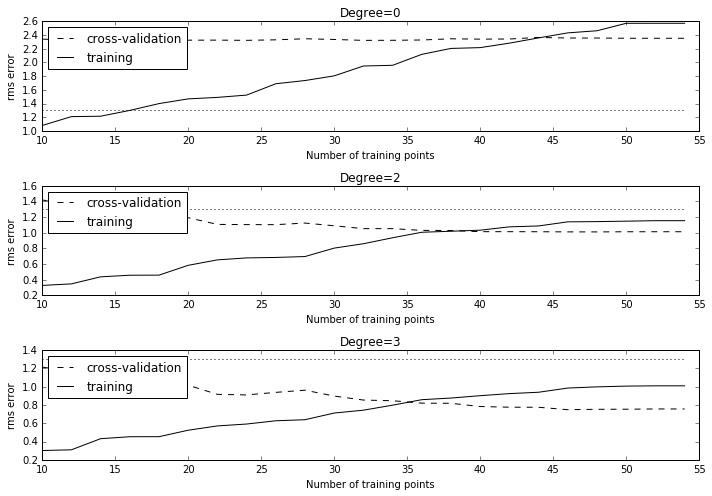

In [10]:
f, ax = plt.subplots(3,1,figsize=(10,7))
Nrange = np.arange(10, 56, 2)
i=0
for d in [0, 2, 3]:
    training_err = np.zeros(Nrange.shape)
    crossval_err = np.zeros(Nrange.shape)
    for j, N in enumerate(Nrange):
        p = np.polyfit(training[:N], training_y[:N], d)
        training_err[j] = np.sqrt(np.sum((np.polyval(p, training[:N])
                                          - training_y[:N]) ** 2) / len(training_y))
        crossval_err[j] = np.sqrt(np.sum((np.polyval(p, cross_val)
                                          - cross_val_y) ** 2) / len(cross_val_y))
    ax[i].plot(Nrange, crossval_err, '--k', label='cross-validation')
    ax[i].plot(Nrange, training_err, '-k', label='training')
    ax[i].plot(Nrange, 1.3* np.ones(Nrange.shape), ':k')
    ax[i].set_xlabel('Number of training points')
    ax[i].set_ylabel('rms error')
    ax[i].set_title('Degree=%d'%d)
    ax[i].legend(loc=2)
    i=i+1
plt.tight_layout()
plt.show()


We see that in cases degree 0,2,3,all of them started with a bigger variance when there are less training points because smaller data set leads to over-fitting of the training set. It is reduced by increasing the number of data sets and cross validation error is also decreased. Error of the training set increases because the model is less over-fitting when there are more training sets. 

## Problem 2

In [11]:
dist=stats.laplace(0,0.5)
r=dist.rvs(1000)
r.sort()
p=dist.pdf(r)

In [12]:
# def sdnorm(z):
def lap(x):
#     return stats.norm.pdf(z)
    dist=stats.laplace(0,0.5)
    return dist.pdf(x)

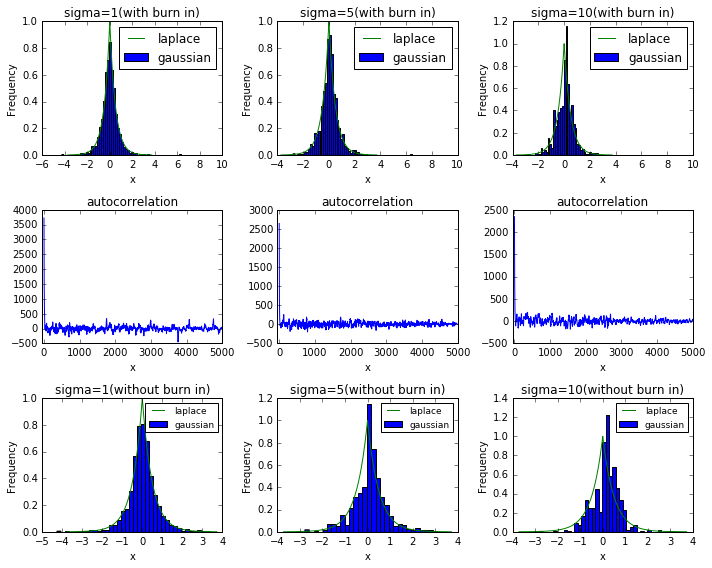

In [13]:
f,ax=plt.subplots(3,3,figsize=(10,8))
n = 5000
sigma = [1,5,10]
for j,sigma_j in enumerate(sigma):
    x = 10.
    vec = []
    vec.append(x)
    innov = np.random.normal(0,sigma_j,n) #proposal distribution
    for i in xrange(1,n):
        can = x + innov[i] #candidate
        aprob = min([1.,lap(can)/lap(x)]) #acceptance probability
        u = np.random.uniform(0,1)
        if u < aprob:
            x = can
            vec.append(x)
        else:
            vec.append(x)
    auto = np.correlate(vec, vec, mode='full')
    auto=auto[auto.size/2:]
    ax[0][j].hist(vec,bins='scott',normed=True,label="gaussian")
    ax[0][j].plot(r,p,label="laplace")
    ax[0][j].set_title('sigma=%d(with burn in)'%sigma_j)
    ax[0][j].set_ylabel('Frequency')
    ax[0][j].set_xlabel('x') 
    ax[0][j].legend()

    ax[1][j].plot(auto)
    ax[1][j].set_title("autocorrelation")
    ax[1][j].set_xlim(-50,5000)
    ax[1][j].set_xlabel("x")
    
    ax[2][j].hist(vec[3000:],bins='scott',normed=True,label="gaussian")
    ax[2][j].plot(r,p,label="laplace")
    ax[2][j].set_title('sigma=%d(without burn in)'%sigma_j)
    ax[2][j].set_ylabel('Frequency')
    ax[2][j].set_xlabel('x')
    ax[2][j].legend(fontsize=9)
plt.tight_layout()
plt.show()

After plotting the autocorrelation function, we see that the datas have a higher autocorrelation in the beginning, and it starts to become more independent around the 3000th data. By intuition, the your moves will be very much affected by your starting guess since that is your starting point. So, we take the last 2000 datas out of 5000 and plot it. Comparing the plot with and without burn in values, we can tell that when we start from a bad guess, it will affect your graph to have extreme values.

## Problem 3

### a)

In [14]:
data = np.genfromtxt('ps5_problem3.dat',dtype=None)
for i in range(len(data)):
    data[i][0]=data[i][0].replace(",","")
y=[float(data[i][0]) for i in range(len(data))]
x=[float(data[i][1]) for i in range(len(data))]
x=np.array(x)
y=np.array(y)
xdata=x

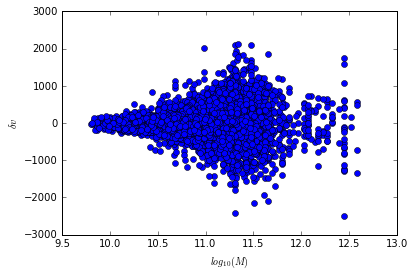

In [15]:
plt.plot(x,y,'bo')
plt.xlabel("$log_{10}(M)$")
plt.ylabel("$\delta v$")
plt.show()

### own MCMC

In [16]:
def sdnorm(x,y,s,a1):
    y_model = s+ a1* (x-10)
    sigma=np.sqrt(10**y_model)
    return (-0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y) ** 2 / sigma ** 2))+1

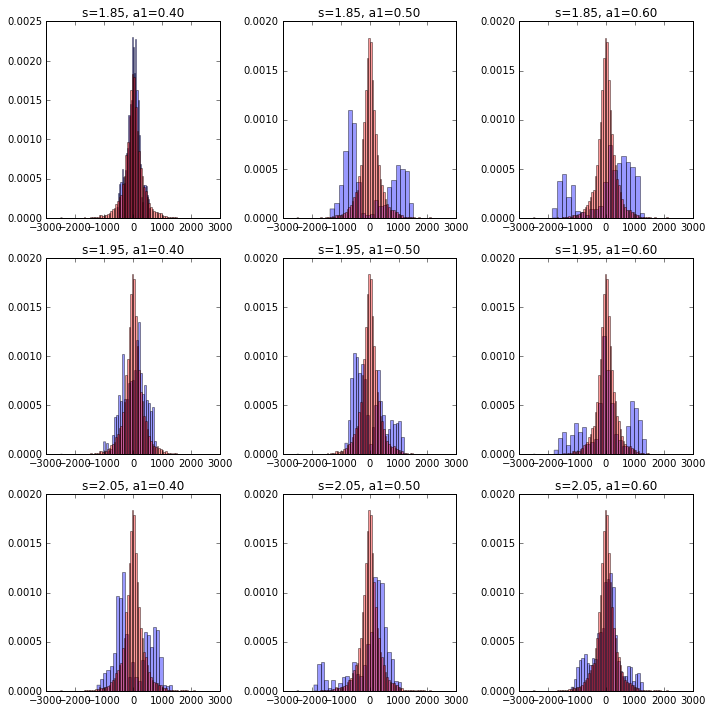

In [17]:
#own MCMC
f,ax=plt.subplots(3,3,figsize=(10,10))
n = len(xdata)
s_2=[1.85,1.95,2.05]
a1_2=[0.4,0.5,0.6]
for a in range(len(s_2)):
    for b in range(len(a1_2)):
        s=s_2[a]
        a1=a1_2[b]
        y_model = s+ a1* (xdata-10)
        sigma=np.sqrt(10**y_model)
        sigma_j = np.mean(sigma)
        x = 0.
        vec = []
        vec.append(x)
        innov = np.random.normal(0,sigma_j,n) # distribution
        for i,num in enumerate(xdata):
            can = x + innov[i] #candidate
            aprob = min([1.,sdnorm(num,can,s,a1)/sdnorm(num,x,s,a1)]) #acceptance probability
            u = np.random.uniform(0,1)
            if u < aprob:
                x = can
                vec.append(x)
            else:
                vec.append(x)
        ax[a][b].hist(vec[3000:]-np.mean(vec[3000:]),bins='scott',normed=True,label="gaussian",alpha=0.4)
        ax[a][b].hist(y,bins="scott",alpha=0.4,color="red",normed=True)
        ax[a][b].set_title('s=%.2f, a1=%.2f'%(s,a1))
plt.tight_layout()
plt.show()


### emcee

In [18]:
def log_prior(theta):
    a1,s = theta
    if 1.85 < s < 2.05 and 0.4< a1 < 0.6:
        return 1;
    else:
        return -np.inf

def log_likelihood(theta, x, y):
    a1,s=theta
    y_model = s+ a1* (x-10)
    sigma=np.sqrt(10**y_model)
    return (-0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y) ** 2 / sigma ** 2))+1

def log_posterior(theta, x, y):
     return log_prior(theta) + log_likelihood(theta, x, y)

In [19]:
# xdata=x
ydata=y

ndim = 2  
nwalkers = 50 
nburn = 1000  
nsteps = 2000 

np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

In [20]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata, ydata])
sampler.run_mcmc(starting_guesses, nsteps)
sample = sampler.chain # shape= (nwalkers,nsteps,ndims)
sample = sampler.chain[:,nburn:,:].reshape(-1,2)

//anaconda/envs/astro/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
//anaconda/envs/astro/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


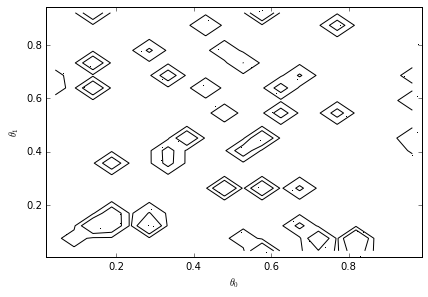

In [21]:
from astroML.plotting import plot_mcmc
fig = plt.figure()
ax = plot_mcmc(sample.T,fig=fig,labels=[r'$\theta_0$', r'$\theta_1$'],colors='k')
ax[0].plot(sample[:,0],sample[:,1],',',color='k',ms=1,alpha=0.1)


In [22]:
# sample_2=sample
# sample_2[:, 1] = np.exp(sample[:, 1])
# s, a1 = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                              zip(*np.percentile(sample_2, [16, 50, 84],
#                                              axis=0)))

In [23]:
# # print sample
# print s,a1
# print a1[1],s[1]
# print a1[1]*(x-10)+s[1]
# x_fit=np.linspace(0,3,len(x))
# plt.plot(x_fit,a1[1]*(x_fit-10)+s[1],'-k')
# plt.xlabel("$log_{10}(M)$")
# plt.ylabel("$\delta v$")
# plt.show()

a1=1.85 and s=0.4 seems to be a better fit according to MCMC.

## Problem 4

In [24]:
data = np.genfromtxt('ps5_problem1.dat',dtype=None,skip_header=1)
# x=data[:,0]
# y=data[:,1]
data=data.T

In [25]:
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

def log_prior(theta):
    return 1;

def log_likelihood(theta, data=data):
    x, y= data
    sigma_y=1.3
    y_fit = polynomial_fit(theta, x)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2)
                         + (y - y_fit) ** 2 / sigma_y ** 2)

def log_posterior(theta, data=data):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta, data)

In [26]:
def compute_mcmc(degree, data=data,
                   log_posterior=log_posterior,
                   nwalkers=50, nburn=1000, nsteps=2000):
    ndim = degree + 1  # this determines the model
    rng = np.random.RandomState(0)
    starting_guesses = rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
    sampler.run_mcmc(starting_guesses, nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)
    return trace

In [27]:
from scipy import integrate
def integrate_posterior_1D(log_posterior, xlim, data=data):
    func = lambda theta0: np.exp(log_posterior([theta0], data))
    return integrate.quad(func, xlim[0][0],xlim[0][1])
#                              lambda x: ylim[0])
def integrate_posterior_2D(log_posterior, xlim, ylim, data=data):
    func = lambda theta1, theta0: np.exp(log_posterior([theta0, theta1], data))
    return integrate.dblquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1])

def integrate_posterior_3D(log_posterior, xlim, ylim, zlim, data=data):
    func = lambda theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2], data))
    return integrate.tplquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1],
                             lambda x, y: zlim[0], lambda x, y: zlim[1])
def integrate_posterior_4D(log_posterior, xlim, ylim, zlim,klim, data=data):
    func = lambda theta3,theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2,theta3], data))
#     return integrate.nquad(func, xlim[0], xlim[1],
#                              lambda x: ylim[0], lambda x: ylim[1],
#                              lambda x, y: zlim[0], lambda x, y: zlim[1],
#                             lambda x, y,z: klim[0], lambda x, y,z: klim[1])
    return integrate.nquad(func, [xlim[0], xlim[1]], [ylim[0], ylim[1]], [zlim[0], zlim[1]], [klim[0], klim[1]])


In [28]:
deg=[0,1,2,3]
sample=[]
for d in deg:
    sample.append(compute_mcmc(d))

In [29]:
xlim= zip(sample[0].min(0), sample[0].max(0))
Z0, err_Z0 = integrate_posterior_1D(log_posterior, xlim)

xlim, ylim = zip(sample[1].min(0), sample[1].max(0))
Z1, err_Z1 = integrate_posterior_2D(log_posterior, xlim, ylim)

xlim, ylim, zlim = zip(sample[2].min(0), sample[2].max(0))
Z2, err_Z2 = integrate_posterior_3D(log_posterior, xlim, ylim, zlim)

xlim, ylim, zlim, klim= zip(sample[3].min(0), sample[3].max(0))
# Z3, err_Z3 = integrate_posterior_4D(log_posterior, xlim, ylim, zlim,klim)

In [30]:
print("Z0 =", Z0, "+/-", err_Z0)  
print("Z1 =", Z1, "+/-", err_Z1)  
print("Z2 =", Z2, "+/-", err_Z2)  
# print("Z3 =", Z3, "+/-", err_Z3)  


('Z0 =', 1.893425303434916e-115, '+/-', 1.6299133679440758e-118)
('Z1 =', 1.0159489349005409e-108, '+/-', 2.4844678055566904e-111)
('Z2 =', 2.3326200453171795e-59, '+/-', 8.851806510783183e-59)


In [31]:
# print("odds ratio z0/z1=%lf" %(Z0*1.0/Z1))  
# print("odds ratio z1/z2=%lf" %(Z1*1.0/Z2)) 
print("odds ratio z1/z0=%lf" %(Z1*1.0/Z0)) 
print("odds ratio z2/z1=%lf" %(Z2*1.0/Z1)) 
# print("odds ratio z3/z2=%lf" %(Z3*1.0/Z2)) 

odds ratio z1/z0=5365666.831733
odds ratio z2/z1=22960012705220639579981416918079908918380749389824.000000


From the odds ratios above, we see that among degree 0,1,2 models, degree 1 is a better model than 0 because the odds ratio is much bigger than 1. Degree 2 is then much better than degree 1. In conclusion, degree 2 is a better model.(I can't get the odds ratio of degree 3 to work...)